In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  ##

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
# from warnings import filterwarnings
# filterwarnings("ignore")

##  Analysing Dataset


In [2]:
df = pd.read_csv('data.csv',sep=',',encoding="utf-8")
df.head()

,bp,oxy,hb,ecg,temp,target
0,125,96,58,202,98,1
1,124,98,62,218,98,1
2,120,94,60,345,97,1
3,125,96,56,309,96,1
4,125,96,56,267,96,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   bp      5000 non-null   int64
 1   oxy     5000 non-null   int64
 2   hb      5000 non-null   int64
 3   ecg     5000 non-null   int64
 4   temp    5000 non-null   int64
 5   target  5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


In [4]:
df

,bp,oxy,hb,ecg,temp,target
0,125,96,58,202,98,1
1,124,98,62,218,98,1
2,120,94,60,345,97,1
3,125,96,56,309,96,1
4,125,96,56,267,96,1
...,...,...,...,...,...,...
4995,172,71,87,847,107,4
4996,170,65,81,924,107,4
4997,176,74,86,802,109,4
4998,172,64,92,934,109,4


In [5]:
df.shape

(5000, 6)

In [6]:
df.isna().sum()

bp        0
oxy       0
hb        0
ecg       0
temp      0
target    0
dtype: int64

In [7]:
df.apply(lambda x:len(x.unique()))


bp         61
oxy        46
hb         47
ecg       782
temp       22
target      4
dtype: int64

In [8]:
print('bp ',df['bp'].unique())
print('oxy ',df['oxy'].unique())
print('hb ',df['hb'].unique())
print('ecg ',df['ecg'].unique())
print('temp ',df['temp'].unique())
print('target ',df['target'].unique())


bp  [125 124 120 128 130 129 126 123 127 121 122  98  87  91  82  53  72  67
  63  49 137 135 136 132 134 138 139 131 133 140 149 141 160 145 142 150
 159 143 153 144 156 154 146 155 152 158 148 147 151 157 170 171 180 172
 174 173 177 178 179 175 176]
oxy  [ 96  98  94  97  95  59  52  50  51  41  60  93  91  92  90  86  84  88
  82  83  80  89  85  81  87  99 104  75  61  67  65  74  63  69  78  72
  68  64  66  71  62  77  70  76  79  73]
hb  [ 58  62  60  56  61  59  57  63  64  68  71  70  74  69  73  72  67  65
  66  52  50  42  76  78  81  80  79  77  75  86  94  87  93  89  82  90
  83  85  92  91  95  88  84 107 148 110 141]
ecg  [ 202  218  345  309  267  253  344  308  379  250  280  347  328  256
  297  283  216  237  212  301  228  333  263  324  321  284  257  390
  278  383  323  293  350  213  235  206  258  356  292  231  331  299
  239  289  367  244  315  304  326  240  306  248  251  389  327  338
  233  208  285  265  336  291  330  210  201  203  220  346  377  31

(array([   4., 1115., 1249., 1752.,  794.,   81.,    3.,    0.,    0.,
           2.]),
 array([ 42. ,  52.6,  63.2,  73.8,  84.4,  95. , 105.6, 116.2, 126.8,
        137.4, 148. ]),
 <BarContainer object of 10 artists>)

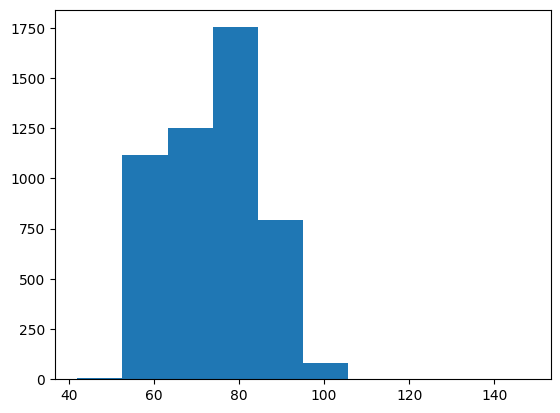

In [9]:
plt.hist(df['hb'], bins=None, range=None, density=False)

(array([1.000e+00, 3.000e+00, 1.000e+00, 4.420e+02, 3.650e+02, 3.420e+02,
        7.910e+02, 1.039e+03, 1.756e+03, 2.600e+02]),
 array([ 41. ,  47.3,  53.6,  59.9,  66.2,  72.5,  78.8,  85.1,  91.4,
         97.7, 104. ]),
 <BarContainer object of 10 artists>)

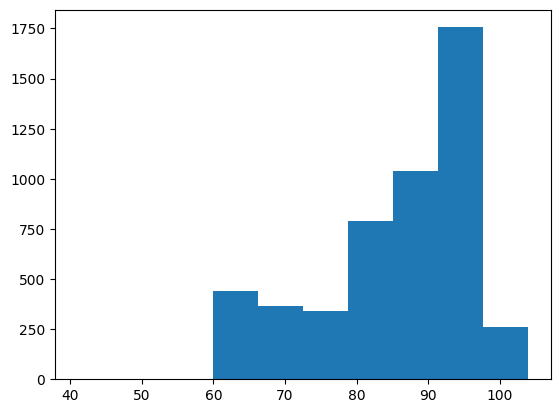

In [10]:
plt.hist(df['oxy'], bins=None, range=None, density=False)

In [11]:
df.columns

Index(['bp', 'oxy', 'hb', 'ecg', 'temp', 'target'], dtype='object')

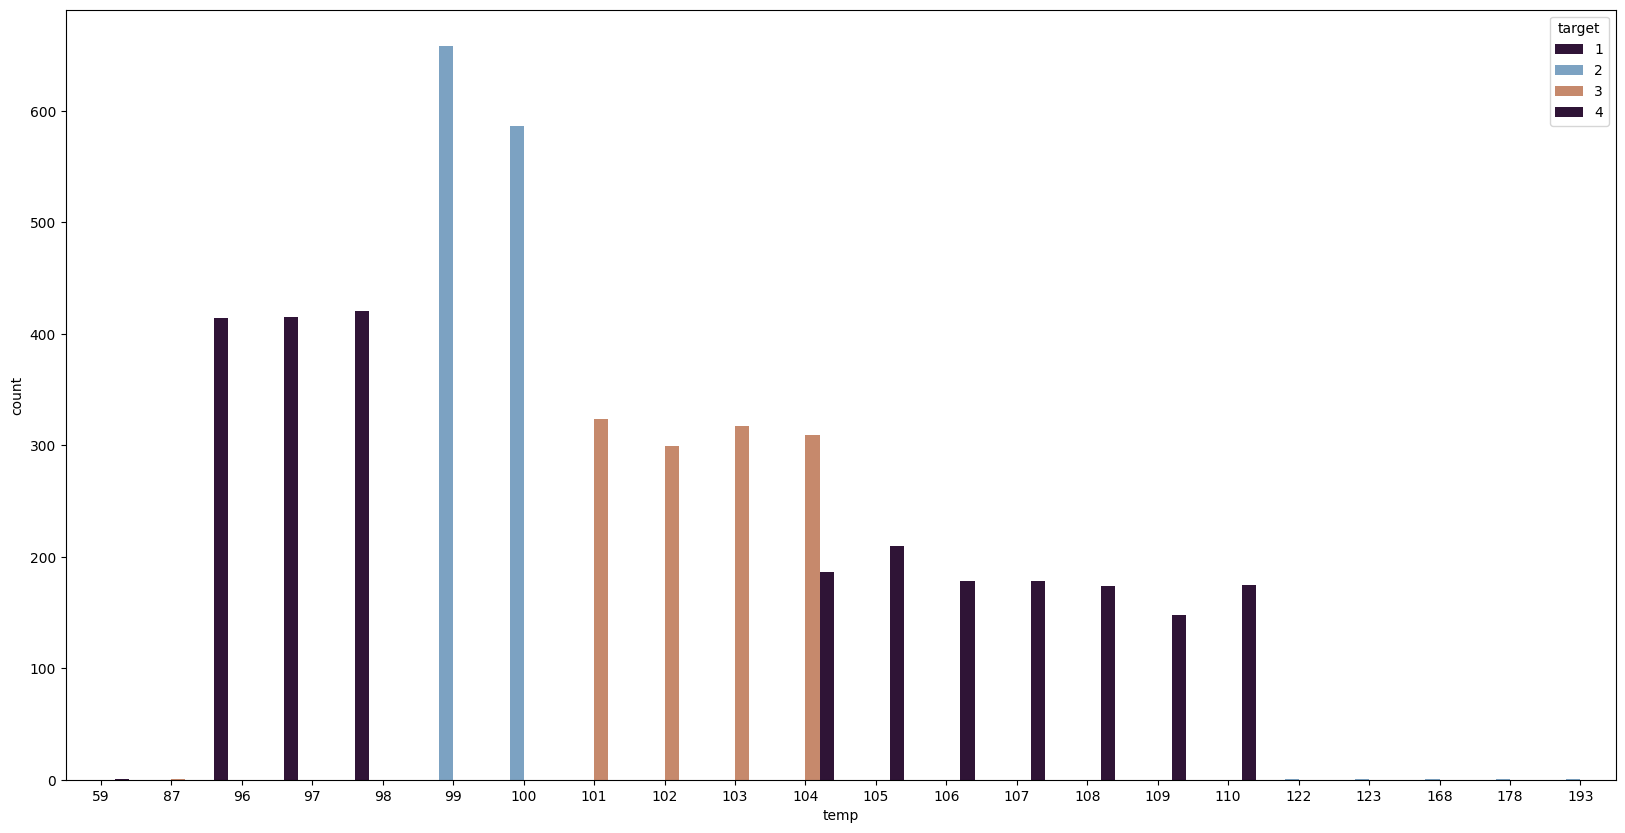

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['temp'],data=df,hue='target',palette="twilight_shifted",saturation=2,dodge=True,)

plt.savefig("Target&temp.png")

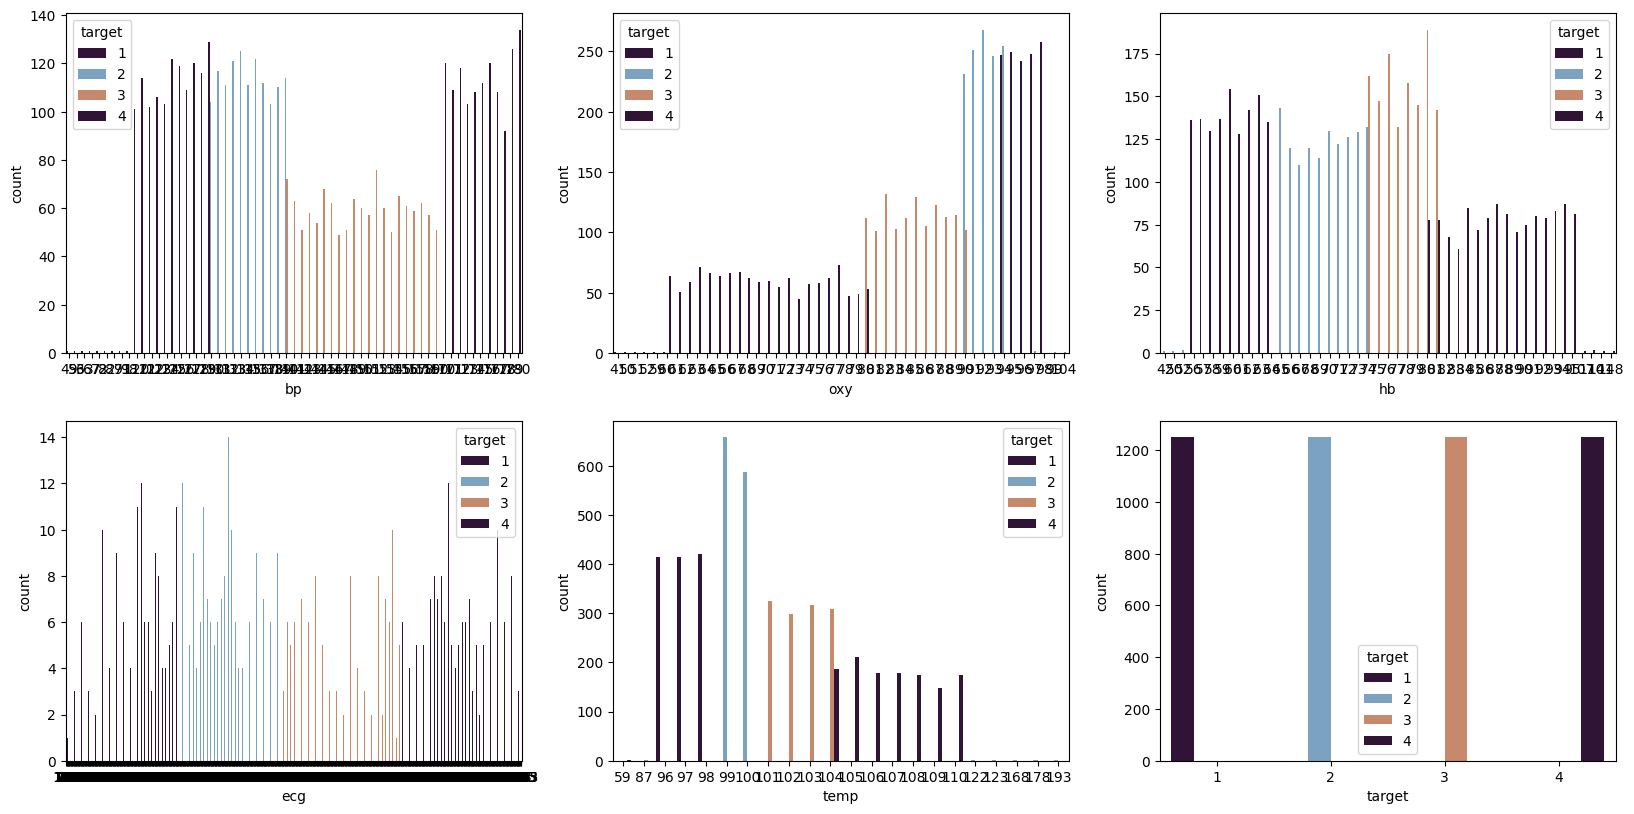

In [13]:
list = ['bp','oxy','hb','ecg','temp','target']
m=1
plt.figure(figsize=(20,15))
for i in list:
    plt.subplot(3,3,m)
    sns.countplot(x=i,data=df,hue='target',palette="twilight_shifted",
    saturation=2,dodge=True)
    m+=1
    
plt.savefig("TargetRelation.png")

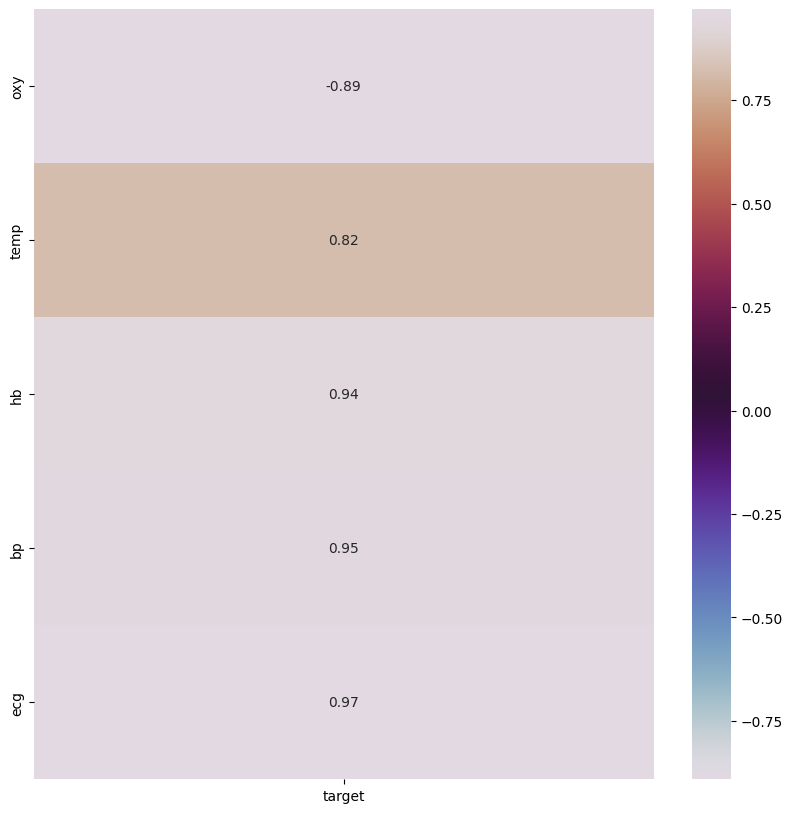

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(df.corr()['target']).sort_values(by='target').transpose().drop('target',axis=1).transpose(),annot=True,cmap='twilight')
plt.savefig("TargetCorrelations.png")

C:\Users\Network Lab 6\AppData\Local\Temp\ipykernel_16828\1987920583.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x='Importance (%)',y='Feature',orient='h',data=features_data,palette='twilight_shifted_r')


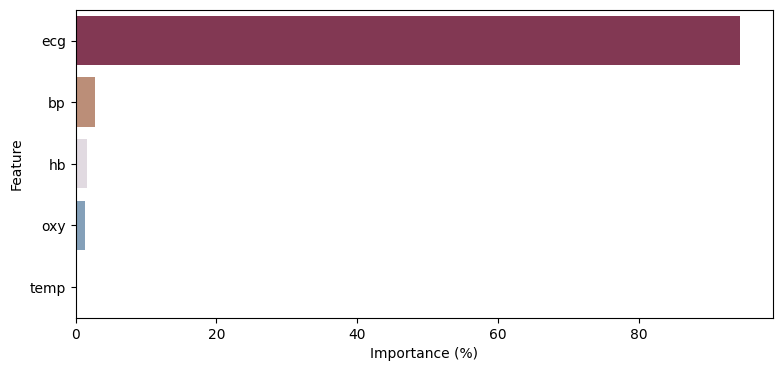

In [16]:
X = df.drop('target',axis=1)
Y = df['target']
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X, Y)
per = []
for i in fs.scores_:
    per.append(round(((i/sum(fs.scores_))*100),3))

features_data = pd.DataFrame({'Feature':X.columns,'Scores':fs.scores_,'Importance (%)':per}).sort_values(by=['Scores'],ascending=False)

plt.figure(figsize=(9,4))
sns.barplot( x='Importance (%)',y='Feature',orient='h',data=features_data,palette='twilight_shifted_r')
insignificant = features_data.loc[features_data['Importance (%)']<0.005]['Feature'].unique()
features_data = features_data.set_index('Feature')
features_data
plt.savefig("FeatureImportance.png")

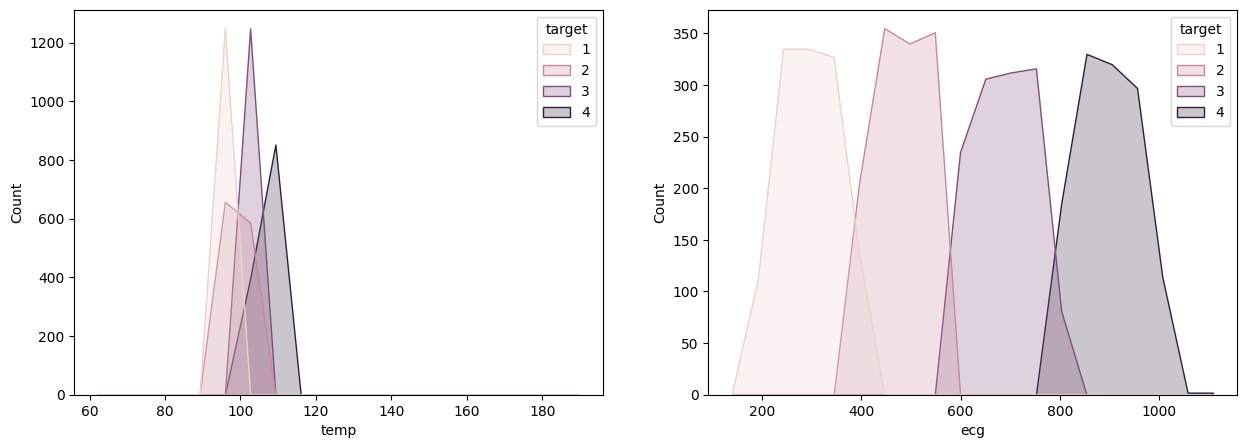

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df,hue='target',x='temp',bins=20,element='poly')
plt.subplot(1,2,2)
sns.histplot(data=df,hue='target',x='ecg',bins=20,element='poly')
plt.savefig("Thalach&oldpeak_Histplot.png")

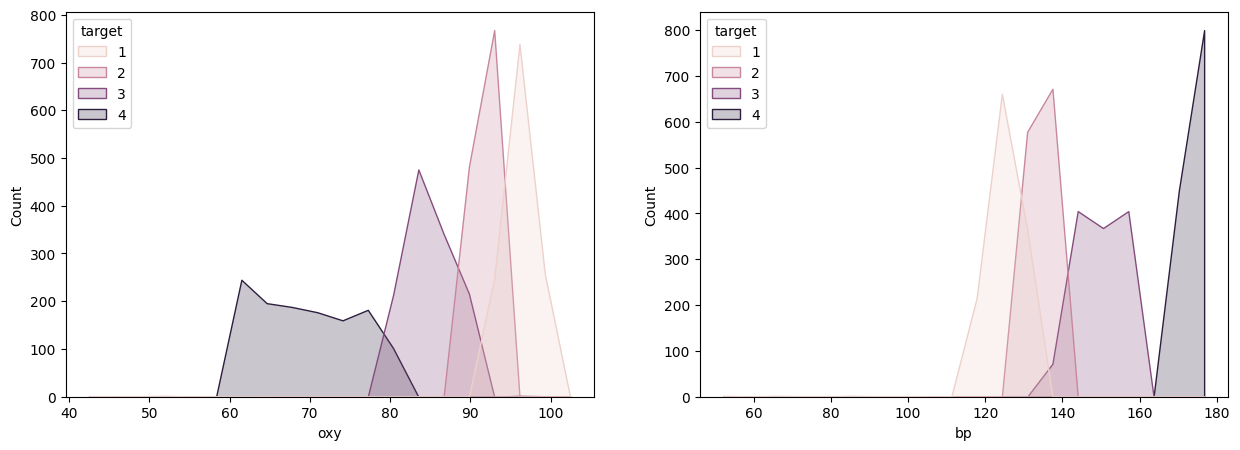

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df,hue='target',x='oxy',bins=20,element='poly')
plt.subplot(1,2,2)
sns.histplot(data=df,hue='target',x='bp',bins=20,element='poly')
plt.savefig("Resting_blood_pressure&chol_Histplot.png")

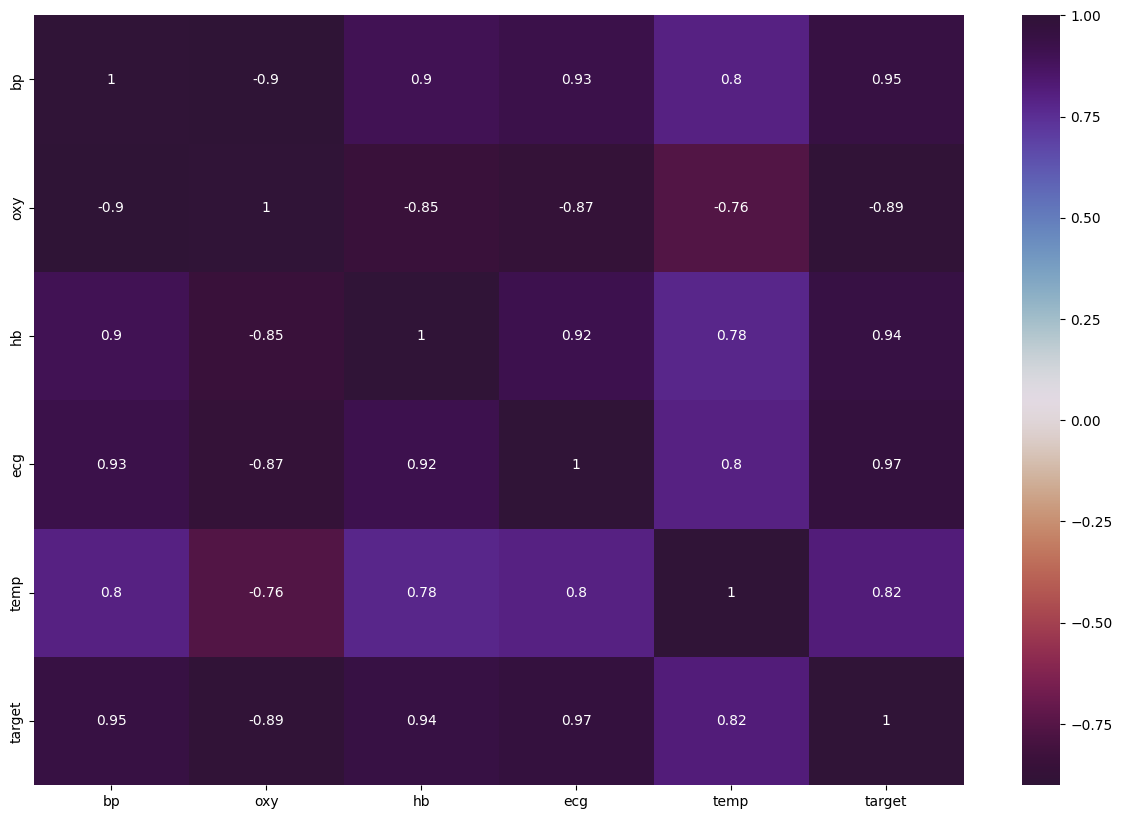

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cbar = True, annot =True,cmap='twilight_shifted_r');
plt.savefig("heatmap.png")

In [22]:
df.columns

Index(['bp', 'oxy', 'hb', 'ecg', 'temp', 'target'], dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   bp      5000 non-null   int64
 1   oxy     5000 non-null   int64
 2   hb      5000 non-null   int64
 3   ecg     5000 non-null   int64
 4   temp    5000 non-null   int64
 5   target  5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


In [24]:
df.describe()

,bp,oxy,hb,ecg,temp,target
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,146.191200,85.642800,73.706000,590.825000,101.504000,2.500000
std,19.483895,10.702472,10.814294,232.566449,4.402892,1.118146
min,49.000000,41.000000,42.000000,116.000000,59.000000,1.000000
25%,130.000000,80.000000,64.000000,393.750000,98.000000,1.750000
50%,140.000000,90.000000,74.000000,579.500000,101.000000,2.500000
75%,162.500000,94.000000,81.000000,794.500000,104.000000,3.250000
max,180.000000,104.000000,148.000000,1133.000000,193.000000,4.000000


___________________________________

# Modelling
___________________________

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression




from sklearn.ensemble import RandomForestClassifier
from sklearn import tree





from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,plot_roc_curve,accuracy_score,roc_curve,roc_auc_score,recall_score
from mlxtend.plotting import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split


In [30]:
X = df.drop('target',axis=1).values
Y = df['target'].values

In [31]:
df

,bp,oxy,hb,ecg,temp,target
0,125,96,58,202,98,1
1,124,98,62,218,98,1
2,120,94,60,345,97,1
3,125,96,56,309,96,1
4,125,96,56,267,96,1
...,...,...,...,...,...,...
4995,172,71,87,847,107,4
4996,170,65,81,924,107,4
4997,176,74,86,802,109,4
4998,172,64,92,934,109,4


In [32]:
X.shape

(5000, 5)

In [33]:
Y.shape

(5000,)

In [34]:
# Split the dataset into training and testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4000, 5)
(1000, 5)
(4000,)
(1000,)


------------------------
**` 1-LogisticRegression`**
----------------------

In [36]:
# Train and predict.
LL = LogisticRegression(solver='liblinear',max_iter = 1000, random_state = 31)
LL.fit(X_train,Y_train)
Y_pred_lr = LL.predict(X_test) 
prd = LL.predict([[124,98,62,218,98]])
print("the prediciton is ",prd)
y_pred_lr = np.around(Y_pred_lr)
print(y_pred_lr)

the prediciton is  [1]
[1 4 4 4 1 3 1 2 1 2 4 2 4 1 1 3 1 3 2 2 1 3 1 4 4 1 3 4 3 1 4 4 4 2 2 2 4
 3 4 3 3 3 4 2 1 2 1 4 1 3 4 3 1 2 2 4 1 4 1 3 3 1 3 3 4 1 2 2 4 2 1 4 2 3
 1 2 1 1 3 3 3 1 3 1 2 1 1 2 2 3 3 1 4 1 1 3 3 4 3 1 1 2 4 4 1 4 3 2 4 2 1
 4 3 2 2 3 4 4 4 3 2 4 2 4 4 4 1 3 4 2 1 4 3 1 1 3 2 4 2 3 2 1 3 4 2 2 4 3
 4 3 1 3 4 4 1 1 4 2 1 4 1 4 3 1 2 3 4 4 4 1 2 4 4 1 2 3 4 3 4 3 1 1 1 1 3
 1 3 1 4 3 4 4 1 1 1 3 4 2 4 1 1 4 3 1 2 1 4 2 4 2 3 3 3 4 1 4 1 3 2 1 4 3
 2 3 1 1 3 1 4 2 3 1 3 2 4 1 3 1 1 1 4 3 4 1 4 3 3 2 4 2 1 1 2 4 3 3 3 3 4
 3 3 4 2 2 4 2 1 2 4 1 3 3 4 3 3 2 1 1 4 1 1 4 4 3 2 3 1 1 4 2 3 3 3 1 2 1
 4 2 4 2 4 3 1 4 3 1 3 3 4 1 4 4 1 1 4 2 1 3 3 2 3 3 3 3 1 1 4 3 4 1 1 2 3
 4 3 4 3 1 2 4 3 4 4 4 3 1 4 3 2 4 4 4 2 1 4 3 3 4 4 2 2 2 2 1 2 4 4 4 2 4
 4 2 4 2 1 4 3 2 2 3 1 4 2 4 4 2 3 4 1 3 1 4 2 3 3 1 1 1 1 2 4 3 3 2 1 2 3
 3 3 3 1 4 2 1 1 4 1 3 4 2 3 1 4 3 2 2 2 3 3 2 2 1 4 3 2 2 3 3 2 1 3 4 2 4
 4 4 2 4 3 1 3 2 3 4 1 4 1 4 3 3 3 1 4 1 1 1 3 3 2 3 1 2 2 1 4 2 4 1 2 1 4
 3

In [37]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,4)
score_lr

96.7

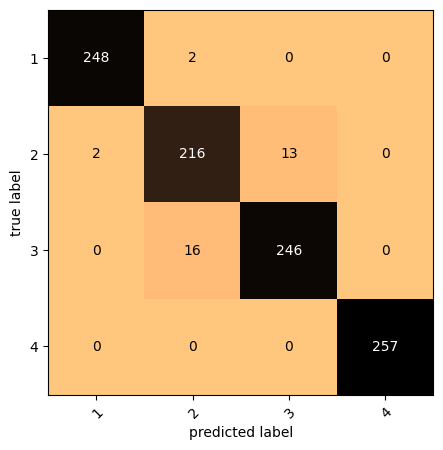

In [38]:
# Confusion matrix.
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_lr)
plot_confusion_matrix(conf_mat,class_names=["1","2","3","4"],figsize=(12,5),cmap='copper_r'); #fn
plt.savefig("LRcrr.png")

In [39]:
from sklearn import metrics
print(metrics.classification_report(Y_test,y_pred_lr))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       250
           2       0.92      0.94      0.93       231
           3       0.95      0.94      0.94       262
           4       1.00      1.00      1.00       257

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



-----------------------
**`-2- RandomForestClassifier`**
--------------------

In [40]:
max_accuracy = 0


for x in range(500):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)



100.0
0


In [41]:
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
Y_pred_rf.shape


(1000,)

In [42]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
score_rf

100.0

In [43]:
Y_pred_rf = np.around(Y_pred_rf)
print(metrics.classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       250
           2       1.00      1.00      1.00       231
           3       1.00      1.00      1.00       262
           4       1.00      1.00      1.00       257

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



-----------------------
**`-3- Showing Final Scores`**
--------------------

In [45]:
scores = [score_lr,score_rf]
Models = ["Logistic Regression","Random Forest"]    

for i in range(len(Models)):
    print("The accuracy score achieved using "+Models[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 96.7 %
The accuracy score achieved using Random Forest is: 100.0 %


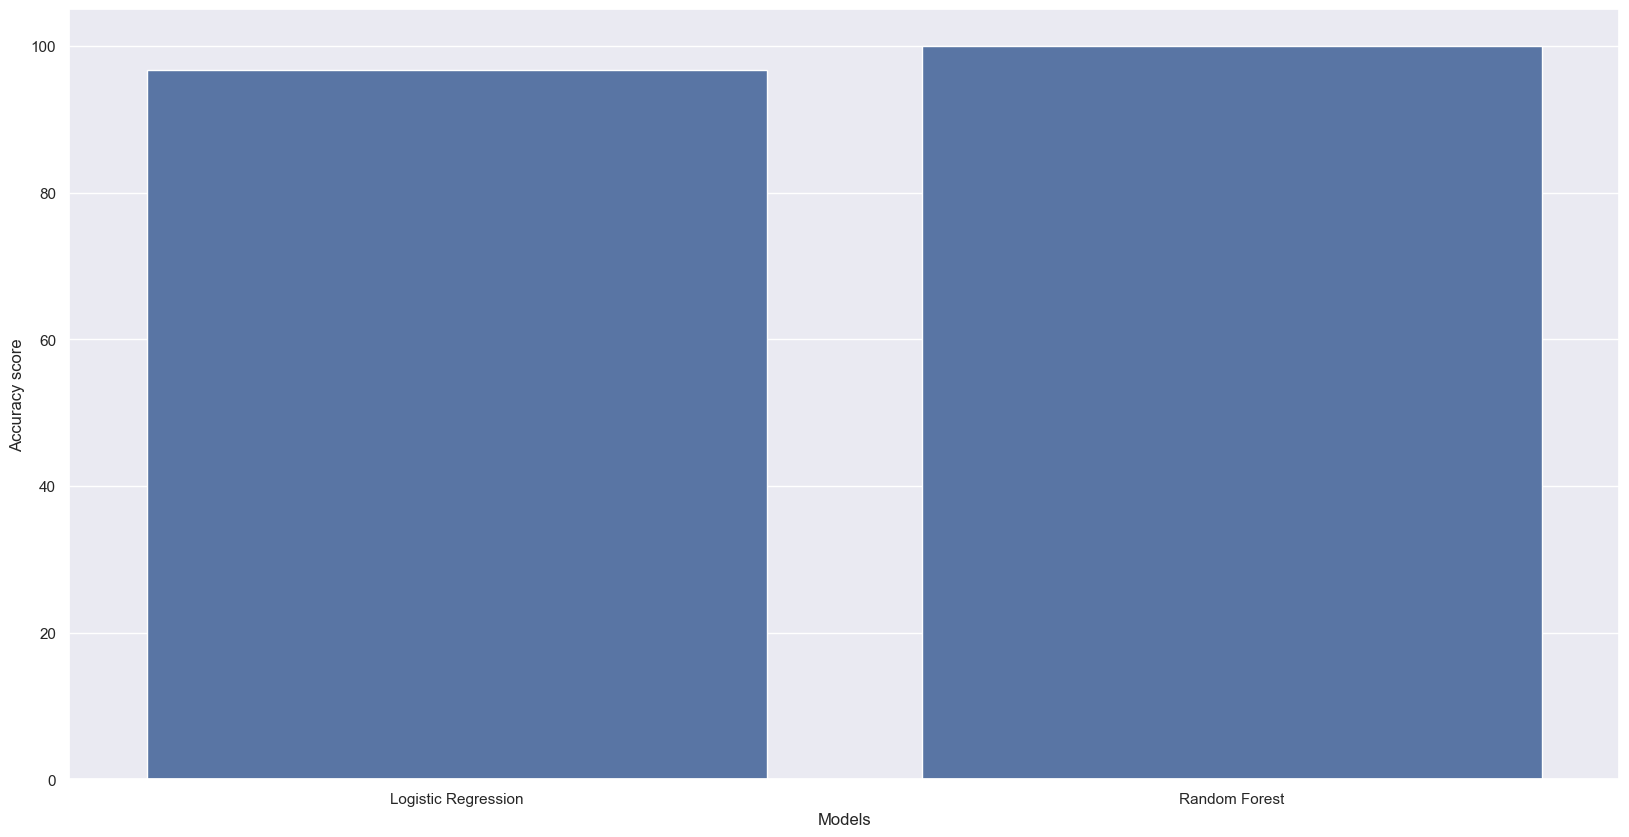

In [46]:
sns.set(style="darkgrid",rc={'figure.figsize':(20,10)})
plt.xlabel("Models",loc='center')
plt.ylabel("Accuracy score")

sns.barplot(x=Models,y=scores)
plt.savefig("AccuracyScores.png")

In [47]:
df.describe()

,bp,oxy,hb,ecg,temp,target
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,146.191200,85.642800,73.706000,590.825000,101.504000,2.500000
std,19.483895,10.702472,10.814294,232.566449,4.402892,1.118146
min,49.000000,41.000000,42.000000,116.000000,59.000000,1.000000
25%,130.000000,80.000000,64.000000,393.750000,98.000000,1.750000
50%,140.000000,90.000000,74.000000,579.500000,101.000000,2.500000
75%,162.500000,94.000000,81.000000,794.500000,104.000000,3.250000
max,180.000000,104.000000,148.000000,1133.000000,193.000000,4.000000


In [48]:
df.head()

,bp,oxy,hb,ecg,temp,target
0,125,96,58,202,98,1
1,124,98,62,218,98,1
2,120,94,60,345,97,1
3,125,96,56,309,96,1
4,125,96,56,267,96,1


In [49]:
df.tail()


,bp,oxy,hb,ecg,temp,target
4995,172,71,87,847,107,4
4996,170,65,81,924,107,4
4997,176,74,86,802,109,4
4998,172,64,92,934,109,4
4999,177,63,90,834,107,4
